In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import skimage.io
import skimage.color
#import efficientnet.keras as efn
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [7]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=359, horizontal_flip=True, width_shift_range=0.1,
    height_shift_range=0.1, zoom_range=.1 )
#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
#To obtain grayscale images
x_train=skimage.color.rgb2gray(x_train)
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

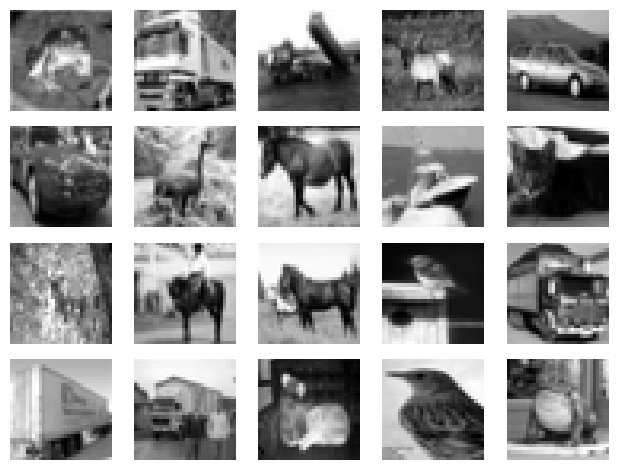

In [10]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.axis('off')
  plt.tight_layout()
  plt.imshow(np.squeeze(x_train[i]), cmap=plt.get_cmap('gray'))
  plt.savefig('./data/data_cifar.pdf')
plt.show()

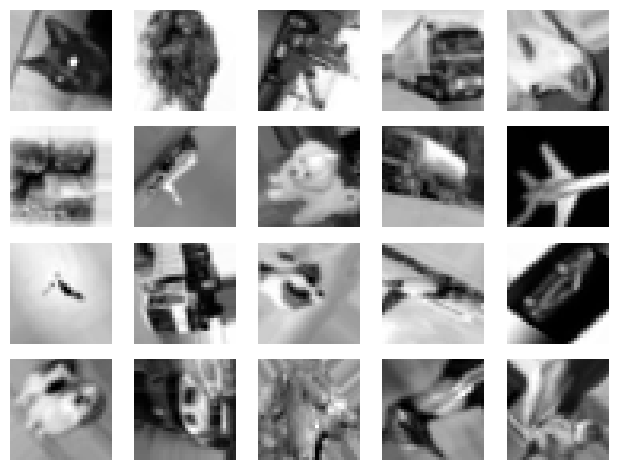

In [13]:
# Sample data augmentation images
for X_batch, y_batch in train_generator.flow(x_train, y_train, batch_size=20):
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(np.squeeze(X_batch[i]),cmap='gray')
        plt.savefig('./Data/data_aug.pdf')
    plt.show()
    break